# Table of Contents

### I. Loading and Preprocessing Data
### II. Creating Text Representations
> ##### 1. Bag Of Words
> ##### 2. TF-IDF

# I. Loading and Preprocessing Data

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Import library
import numpy as np
import pandas as pd

In [2]:
# Read dataset
df = pd.read_csv(r'tweets.csv')

In [3]:
# Print dataset
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,RT @rssurjewala: Critical question: Was PayTM ...,False,0.0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331.0,True,False
1,RT @Hemant_80: Did you vote on #Demonetization...,False,0.0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66.0,True,False
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0.0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12.0,True,False
3,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0.0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338.0,True,False
4,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0.0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120.0,True,False


In [4]:
# Only keep text column
df.drop(df.columns[1:], axis=1, inplace=True)

In [5]:
# Print dataset
df.head()

,text
0,RT @rssurjewala: Critical question: Was PayTM ...
1,RT @Hemant_80: Did you vote on #Demonetization...
2,"RT @roshankar: Former FinSec, RBI Dy Governor,..."
3,RT @ANI_news: Gurugram (Haryana): Post office ...
4,RT @satishacharya: Reddy Wedding! @mail_today ...


# II. Creating Text Representations

## Bag of Words

In [6]:
# Import BoW function from sklearn
from sklearn.feature_extraction.text import CountVectorizer

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [7]:
# Creating an object for the vectorizer
word_bow = CountVectorizer()

In [10]:
# Fit on training data
word_bow.fit(df['text'].values)

CountVectorizer()

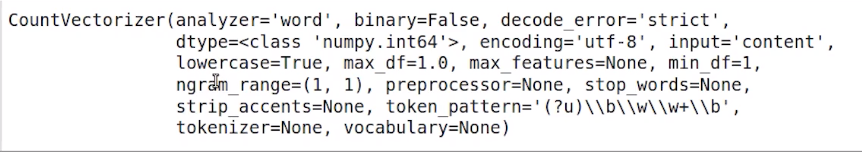

In [11]:
from IPython.display import Image
Image(filename='countvectorizer.png') 

In [12]:
# Transform the training data
word_vectors_bow = word_bow.transform(df['text'].values)

In [13]:
# Features
word_bow.get_feature_names()

['00',
 '000',
 '00716',
 '0080',
 '0081',
 '0082',
 '0083',
 '0084',
 '0085',
 '0086',
 '0087',
 '0088',
 '0089',
 '008a',
 '008b',
 '008c',
 '008d',
 '008e',
 '008f',
 '0090',
 '0091',
 '0092',
 '0094',
 '0095',
 '0097',
 '0098',
 '0099',
 '009a',
 '009b',
 '009c',
 '009d',
 '00a0',
 '00a1',
 '00a2',
 '00a3',
 '00a4',
 '00a5',
 '00a7',
 '00a8',
 '00a9',
 '00aa',
 '00ab',
 '00ad',
 '00ae',
 '00af',
 '00b0',
 '00b1',
 '00b2',
 '00b3',
 '00b4',
 '00b6',
 '00b7',
 '00b8',
 '00b9',
 '00bb',
 '00bc',
 '00bd',
 '00be',
 '00bf',
 '01',
 '01zwcmfzca',
 '0276_gaubert',
 '02rmaokyui',
 '03',
 '04',
 '046ba2opmi',
 '05',
 '086f5vo1ce',
 '0902',
 '0905',
 '0906',
 '090f',
 '0915',
 '0917',
 '091a',
 '091c',
 '091f',
 '0920',
 '0921',
 '0922',
 '0923',
 '0924',
 '0925',
 '0926',
 '0928',
 '092a',
 '092b',
 '092c',
 '092d',
 '092e',
 '092f',
 '0930',
 '0932',
 '0933',
 '0935',
 '0936',
 '0937',
 '0938',
 '0939',
 '093c',
 '093e',
 '093f',
 '0940',
 '0941',
 '0942',
 '0943',
 '0947',
 '0948',
 '094b

In [14]:
# Shape of the matrix
# 5157 documents and 13541 unique words
word_vectors_bow

<5157x13541 sparse matrix of type '<class 'numpy.int64'>'
	with 86437 stored elements in Compressed Sparse Row format>

In [15]:
# Document representation
vocab = word_bow.get_feature_names()
pd.DataFrame(word_vectors_bow.toarray(), columns=vocab)

,00,000,00716,0080,0081,0082,0083,0084,0085,0086,...,zxiusza2s7,zxuecwobqp,zyitjkbklc,zylu2al27f,zymrlzofxm,zyuakjdi4h,zz0mflmpfd,zzh5moxrtq,zzthdwqbfy,zzyjzzuhlu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Reducing sparsity

### 1. Preprocessing document text

In [16]:
# Import relevant libraries
import spacy
import re

# Load English language model
nlp = spacy.load('en_core_web_sm')

In [17]:
# Preprocessing function
def clean(text):
    
    # Remove alphabetic words
    text = ' '.join(re.compile('[^a-zA-Z]+').split(text))

    # Create spacy object
    doc = nlp(text)

    # List to store clean text
    filtered_text = []

    # Iterate over document and save word lemmas
    for token in doc:
        filtered_text.append(token.lemma_)
    
    return " ".join(word for word in filtered_text)

In [18]:
# Apply function
df['text_clean'] = df['text'].apply(clean)

In [19]:
# Print dataset
df.head(10)

,text,text_clean
0,RT @rssurjewala: Critical question: Was PayTM ...,RT rssurjewala Critical question be PayTM info...
1,RT @Hemant_80: Did you vote on #Demonetization...,RT Hemant do -PRON- vote on Demonetization on ...
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",RT roshankar Former FinSec RBI Dy Governor CBD...
3,RT @ANI_news: Gurugram (Haryana): Post office ...,RT ANI news Gurugram Haryana Post office emplo...
4,RT @satishacharya: Reddy Wedding! @mail_today ...,RT satishacharya Reddy Wedding mail today cart...
5,@DerekScissors1: Indias #demonetization: #Bla...,DerekScissors India s demonetization Blackmo...
6,RT @gauravcsawant: Rs 40 lakh looted from a ba...,RT gauravcsawant Rs lakh loot from a bank in K...
7,RT @Joydeep_911: Calling all Nationalists to j...,RT Joydeep call all Nationalists to join walk ...
8,RT @sumitbhati2002: Many opposition leaders ar...,RT sumitbhati many opposition leader be with n...
9,National reform now destroyed even the essence...,national reform now destroy even the essence o...


In [20]:
# Arguments: default values
word_bow = CountVectorizer(binary=False,  # Count the occurances of the terms
                           lowercase=True,  # Lowercase
                           )

In [21]:
# Fit and transform training data
word_vectors_bow = word_bow.fit_transform(df['text_clean'].values)

In [20]:
# Shape of the matrix
word_vectors_bow

<5157x12794 sparse matrix of type '<class 'numpy.int64'>'
	with 85915 stored elements in Compressed Sparse Row format>

In [22]:
# Document representation
vocab = word_bow.get_feature_names()
pd.DataFrame(word_vectors_bow.toarray(), columns=vocab)

,aa,aaadhar,aaanupriyaaa,aadhaar,aadhar,aadhe,aadityagautom,aadmi,aagr,aaj,...,zymrlzofxm,zynql,zyuakjdi,zz,zzdxhds,zzh,zzl,zzthdwqbfy,zzygw,zzyjzzuhlu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. Keep top frequent terms

In [23]:
# Update arguments
word_bow = CountVectorizer(binary=False,  # Count the occurances of the terms
                           lowercase=True,  # Lowercase
                           max_features=5000,  # Max features
                           )

In [24]:
# Fit and transform training data
word_vectors_bow = word_bow.fit_transform(df['text_clean'].values)

In [25]:
# Shape of the matrix
word_vectors_bow

<5157x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 77917 stored elements in Compressed Sparse Row format>

In [26]:
# Document representation
vocab = word_bow.get_feature_names()
pd.DataFrame(word_vectors_bow.toarray(), columns=vocab)

,aa,aadhaar,aadhar,aadmi,aajtak,aam,aamaadmiparty,aamir,aamirkhan,aap,...,zl,zlfw,zm,znvyojsu,zo,zone,zr,zt,zu,zv
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3. Thresholding the occurrence of terms

In [27]:
# Update arguments
word_bow = CountVectorizer(binary=False,  # Count the occurrences of the terms
                           lowercase=True,  # Lowercase
                           max_df=500,  # Max occurrence
                           min_df=10,  # Min occurrence
                           )

In [28]:
# Fit and transform training data
word_vectors_bow = word_bow.fit_transform(df['text_clean'].values)

In [29]:
# Shape of the matrix
word_vectors_bow

<5157x953 sparse matrix of type '<class 'numpy.int64'>'
	with 38975 stored elements in Compressed Sparse Row format>

In [30]:
# Document representation
vocab = word_bow.get_feature_names()
pd.DataFrame(word_vectors_bow.toarray(), columns=vocab) 

,aa,aadhaar,aadmi,aam,aamaadmiparty,aap,able,about,abt,accept,...,year,yes,yet,yogi,young,youtube,youtuber,yrdeshmukh,yt,zone
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4. N-gram BoW

In [31]:
# Update arguments
word_bow = CountVectorizer(binary=False,  # Count the occurances of the terms
                           lowercase=True,  # Lowercase
                           ngram_range=(2,2)  # bi-gram
                           )

In [32]:
# Fit and transform training data
word_vectors_bow = word_bow.fit_transform(df['text_clean'].values)

In [33]:
# Shape of the matrix
word_vectors_bow

<5157x41799 sparse matrix of type '<class 'numpy.int64'>'
	with 85440 stored elements in Compressed Sparse Row format>

In [33]:
# Features
word_bow.get_feature_names()

['aa gaye',
 'aa https',
 'aa lfy',
 'aa lvsy',
 'aa mazc',
 'aa pje',
 'aa rahe',
 'aa to',
 'aa yogi',
 'aaadhar expansion',
 'aaanupriyaaa dear',
 'aadhaar amp',
 'aadhaar and',
 'aadhaar be',
 'aadhaar biometric',
 'aadhaar demonetization',
 'aadhaar evm',
 'aadhaar first',
 'aadhaar https',
 'aadhaar line',
 'aadhaar live',
 'aadhaar platform',
 'aadhaar slave',
 'aadhaar this',
 'aadhaar will',
 'aadhar and',
 'aadhar could',
 'aadhar demonetization',
 'aadhar necessary',
 'aadhar now',
 'aadhe kehte',
 'aadityagautom assam',
 'aadmi aap',
 'aadmi be',
 'aadmi demonetization',
 'aadmi jandhan',
 'aadmi listen',
 'aadmi punish',
 'aadmi support',
 'aagr mb',
 'aaj kiske',
 'aajtak demonetization',
 'aajtak pron',
 'aajtak zeenewshindi',
 'aakashhindocha blog',
 'aakroshdin demonetization',
 'aam aadmi',
 'aamaaadmiparty mamata',
 'aamaadami at',
 'aamaadmi be',
 'aamaadmi shri',
 'aamaadmiparty also',
 'aamaadmiparty arvindkejriwal',
 'aamaadmiparty catch',
 'aamaadmiparty demonst

In [34]:
# Document representation
vocab = word_bow.get_feature_names()
pd.DataFrame(word_vectors_bow.toarray(), columns=vocab)

,aa gaye,aa https,aa lfy,aa lvsy,aa mazc,aa pje,aa rahe,aa to,aa yogi,aaadhar expansion,...,zwpql frwn,zwsoa google,zyitjkbklc via,zylu al,zymrlzofxm https,zz al,zz mflmpfd,zzh moxrtq,zzl offa,zzygw em
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF

In [35]:
# Import tfidf vectorizer function from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [36]:
# Creating an object for the vectorizer
word_tfidf = TfidfVectorizer()

In [37]:
# Fit and transform training data
word_vectors_tfidf = word_tfidf.fit_transform(df['text_clean'].values)

In [38]:
# Shape of the matrix
# Same number of features
word_vectors_tfidf

<5157x12804 sparse matrix of type '<class 'numpy.float64'>'
	with 85893 stored elements in Compressed Sparse Row format>

In [39]:
# Document representation
vocab = word_tfidf.get_feature_names()
pd.DataFrame(word_vectors_tfidf.toarray(), columns=vocab)

,aa,aaadhar,aaanupriyaaa,aadhaar,aadhar,aadhe,aadityagautom,aadmi,aagr,aaj,...,zymrlzofxm,zynql,zyuakjdi,zz,zzdxhds,zzh,zzl,zzthdwqbfy,zzygw,zzyjzzuhlu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.243973,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Modifying argument values

In [40]:
# Update arguments
word_tfidf = TfidfVectorizer(ngram_range=(2,2))  # bi-grams

In [41]:
# Fit and transform training data
word_vectors_tfidf = word_tfidf.fit_transform(df['text_clean'].values)

In [42]:
# Shape of the matrix
word_vectors_tfidf

<5157x41799 sparse matrix of type '<class 'numpy.float64'>'
	with 85440 stored elements in Compressed Sparse Row format>

In [43]:
vocab = word_tfidf.get_feature_names()
pd.DataFrame(word_vectors_tfidf.toarray(), columns=vocab)

,aa gaye,aa https,aa lfy,aa lvsy,aa mazc,aa pje,aa rahe,aa to,aa yogi,aaadhar expansion,...,zwpql frwn,zwsoa google,zyitjkbklc via,zylu al,zymrlzofxm https,zz al,zz mflmpfd,zzh moxrtq,zzl offa,zzygw em
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
